In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_excel('gee.xlsx', header=[1])


In [3]:
df = pd.DataFrame(data)
df

,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Profit Margin,5Y Avg EBITDA Margin,...,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow,Unnamed: 44,Unnamed: 45
0,Reliance Industries Ltd,RELIANCE,Oil & Gas - Refining & Marketing,1.679534e+06,2467.40,34.186904,7.793277,3.957021,9.725370,17.720494,...,74.653049,103222.00,212382.00,579376.00,169843.00,799432.00,-79652.00,26185.00,NaN,NaN
1,Tata Consultancy Services Ltd,TCS,IT Services & Consulting,1.358569e+06,3626.70,41.892356,37.74068,25.932382,19.383065,29.072528,...,87.043624,48462.00,213.00,86063.00,38489.00,87108.00,35727.00,38802.00,NaN,NaN
2,HDFC Bank Ltd,HDFCBANK,Private Banks,8.206363e+05,1486.50,25.779258,16.4352,1.883433,20.420916,28.206116,...,57.899268,44181.15,438823.11,148746.23,121272.52,210442.95,40780.31,42476.46,NaN,NaN
3,Infosys Ltd,INFY,IT Services & Consulting,7.775010e+05,1853.05,40.178853,27.135305,19.417895,18.847214,28.656802,...,45.607423,30090.00,11863.00,73627.00,27056.00,76782.00,21117.00,23224.00,NaN,NaN
4,ICICI Bank Ltd,ICICIBANK,Private Banks,5.002790e+05,710.75,27.212283,12.382897,1.243333,11.395012,11.900543,...,27.461218,27368.40,536578.62,107231.52,147570.54,167175.84,136327.09,138015.30,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Galaxy Bearings Ltd,GALXBRG,Heavy Machinery,1.256577e+02,385.05,15.986985,18.97634,14.784163,12.419024,16.395699,...,24.716981,12.27,0.00,42.18,7.65,45.36,1.31,6.76,NaN,NaN
1996,Signet Industries Ltd,SIGIND,Plastic Products,1.255488e+02,43.00,8.999914,7.11771,2.017514,1.679812,7.751415,...,4.738934,65.98,0.14,144.17,20.66,202.67,-8.33,6.96,NaN,NaN
1997,Suraj Ltd,SURAJLTD,Iron & Steel,1.255056e+02,64.95,91.609935,1.54881,0.76798,0.712132,9.181438,...,0.711167,17.65,0.00,47.98,0.42,89.14,30.05,32.51,NaN,NaN
1998,Polson Ltd,POLSON,Commodity Chemicals,1.253262e+02,10440.00,14.692403,8.487562,4.80009,9.212658,21.724728,...,710.833333,19.62,0.99,103.96,6.63,104.77,13.20,22.41,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            2000 non-null   object 
 1   Ticker                          2000 non-null   object 
 2   Sub-Sector                      1947 non-null   object 
 3   Market Cap                      2000 non-null   float64
 4   Close Price                     2000 non-null   float64
 5   PE Ratio                        1957 non-null   float64
 6   Return on Equity                1870 non-null   object 
 7   Return on Assets                1952 non-null   object 
 8   Net Profit Margin               1953 non-null   float64
 9   5Y Avg EBITDA Margin            1880 non-null   float64
 10  EBITDA Margin                   1953 non-null   object 
 11  1Y Return vs Nifty              2000 non-null   float64
 12  5Y CAGR                         15

In [5]:
df["Sub-Sector"].unique

<bound method Series.unique of 0       Oil & Gas - Refining & Marketing
1               IT Services & Consulting
2                          Private Banks
3               IT Services & Consulting
4                          Private Banks
                      ...               
1995                     Heavy Machinery
1996                    Plastic Products
1997                        Iron & Steel
1998                 Commodity Chemicals
1999      Investment Banking & Brokerage
Name: Sub-Sector, Length: 2000, dtype: object>

<AxesSubplot:xlabel='count', ylabel='Sub-Sector'>

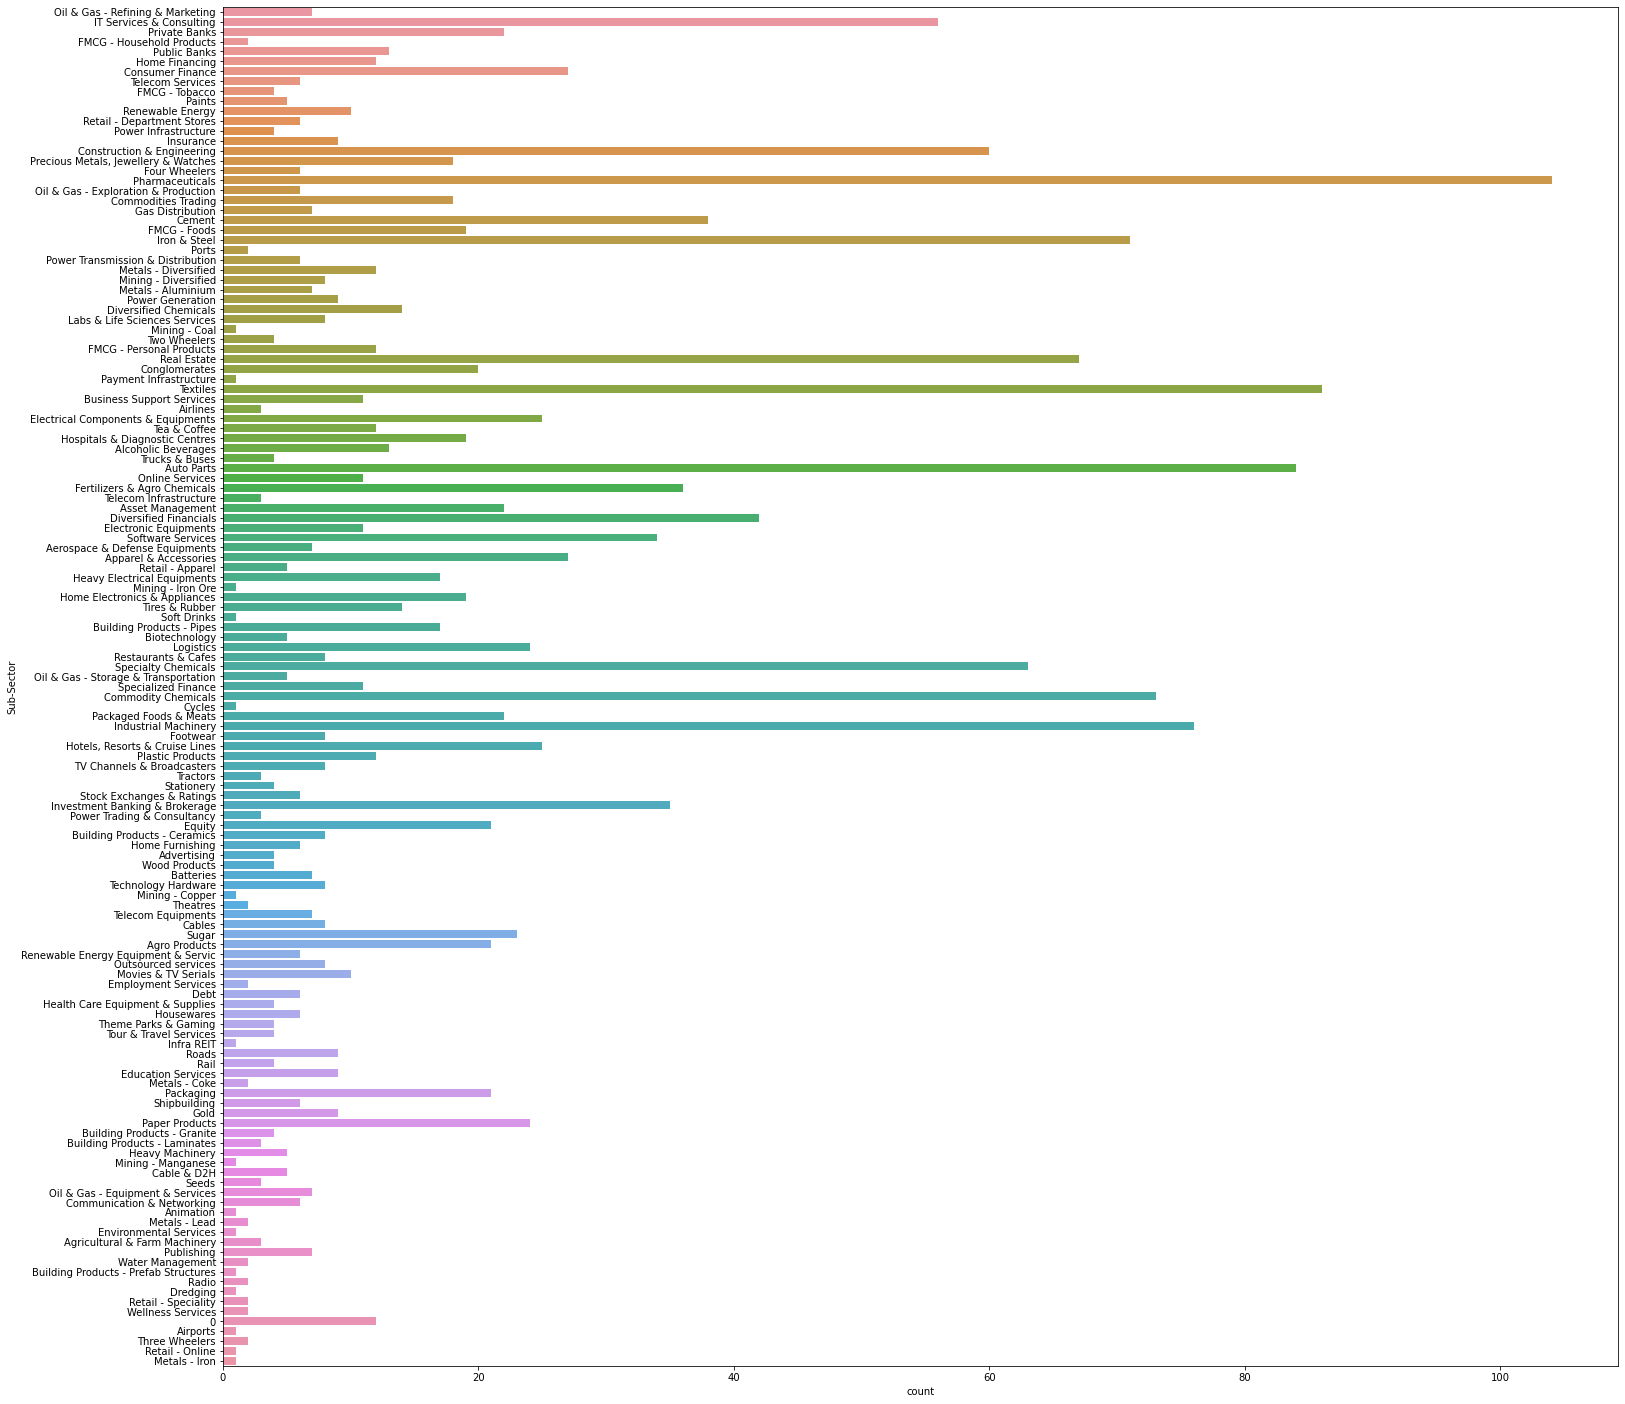

In [6]:
plt.figure(figsize=(25,25))
sns.countplot(y='Sub-Sector',data=df,orient="h" )  


In [7]:
count_val= df["Sub-Sector"].value_counts()

<AxesSubplot:ylabel='Sub-Sector'>

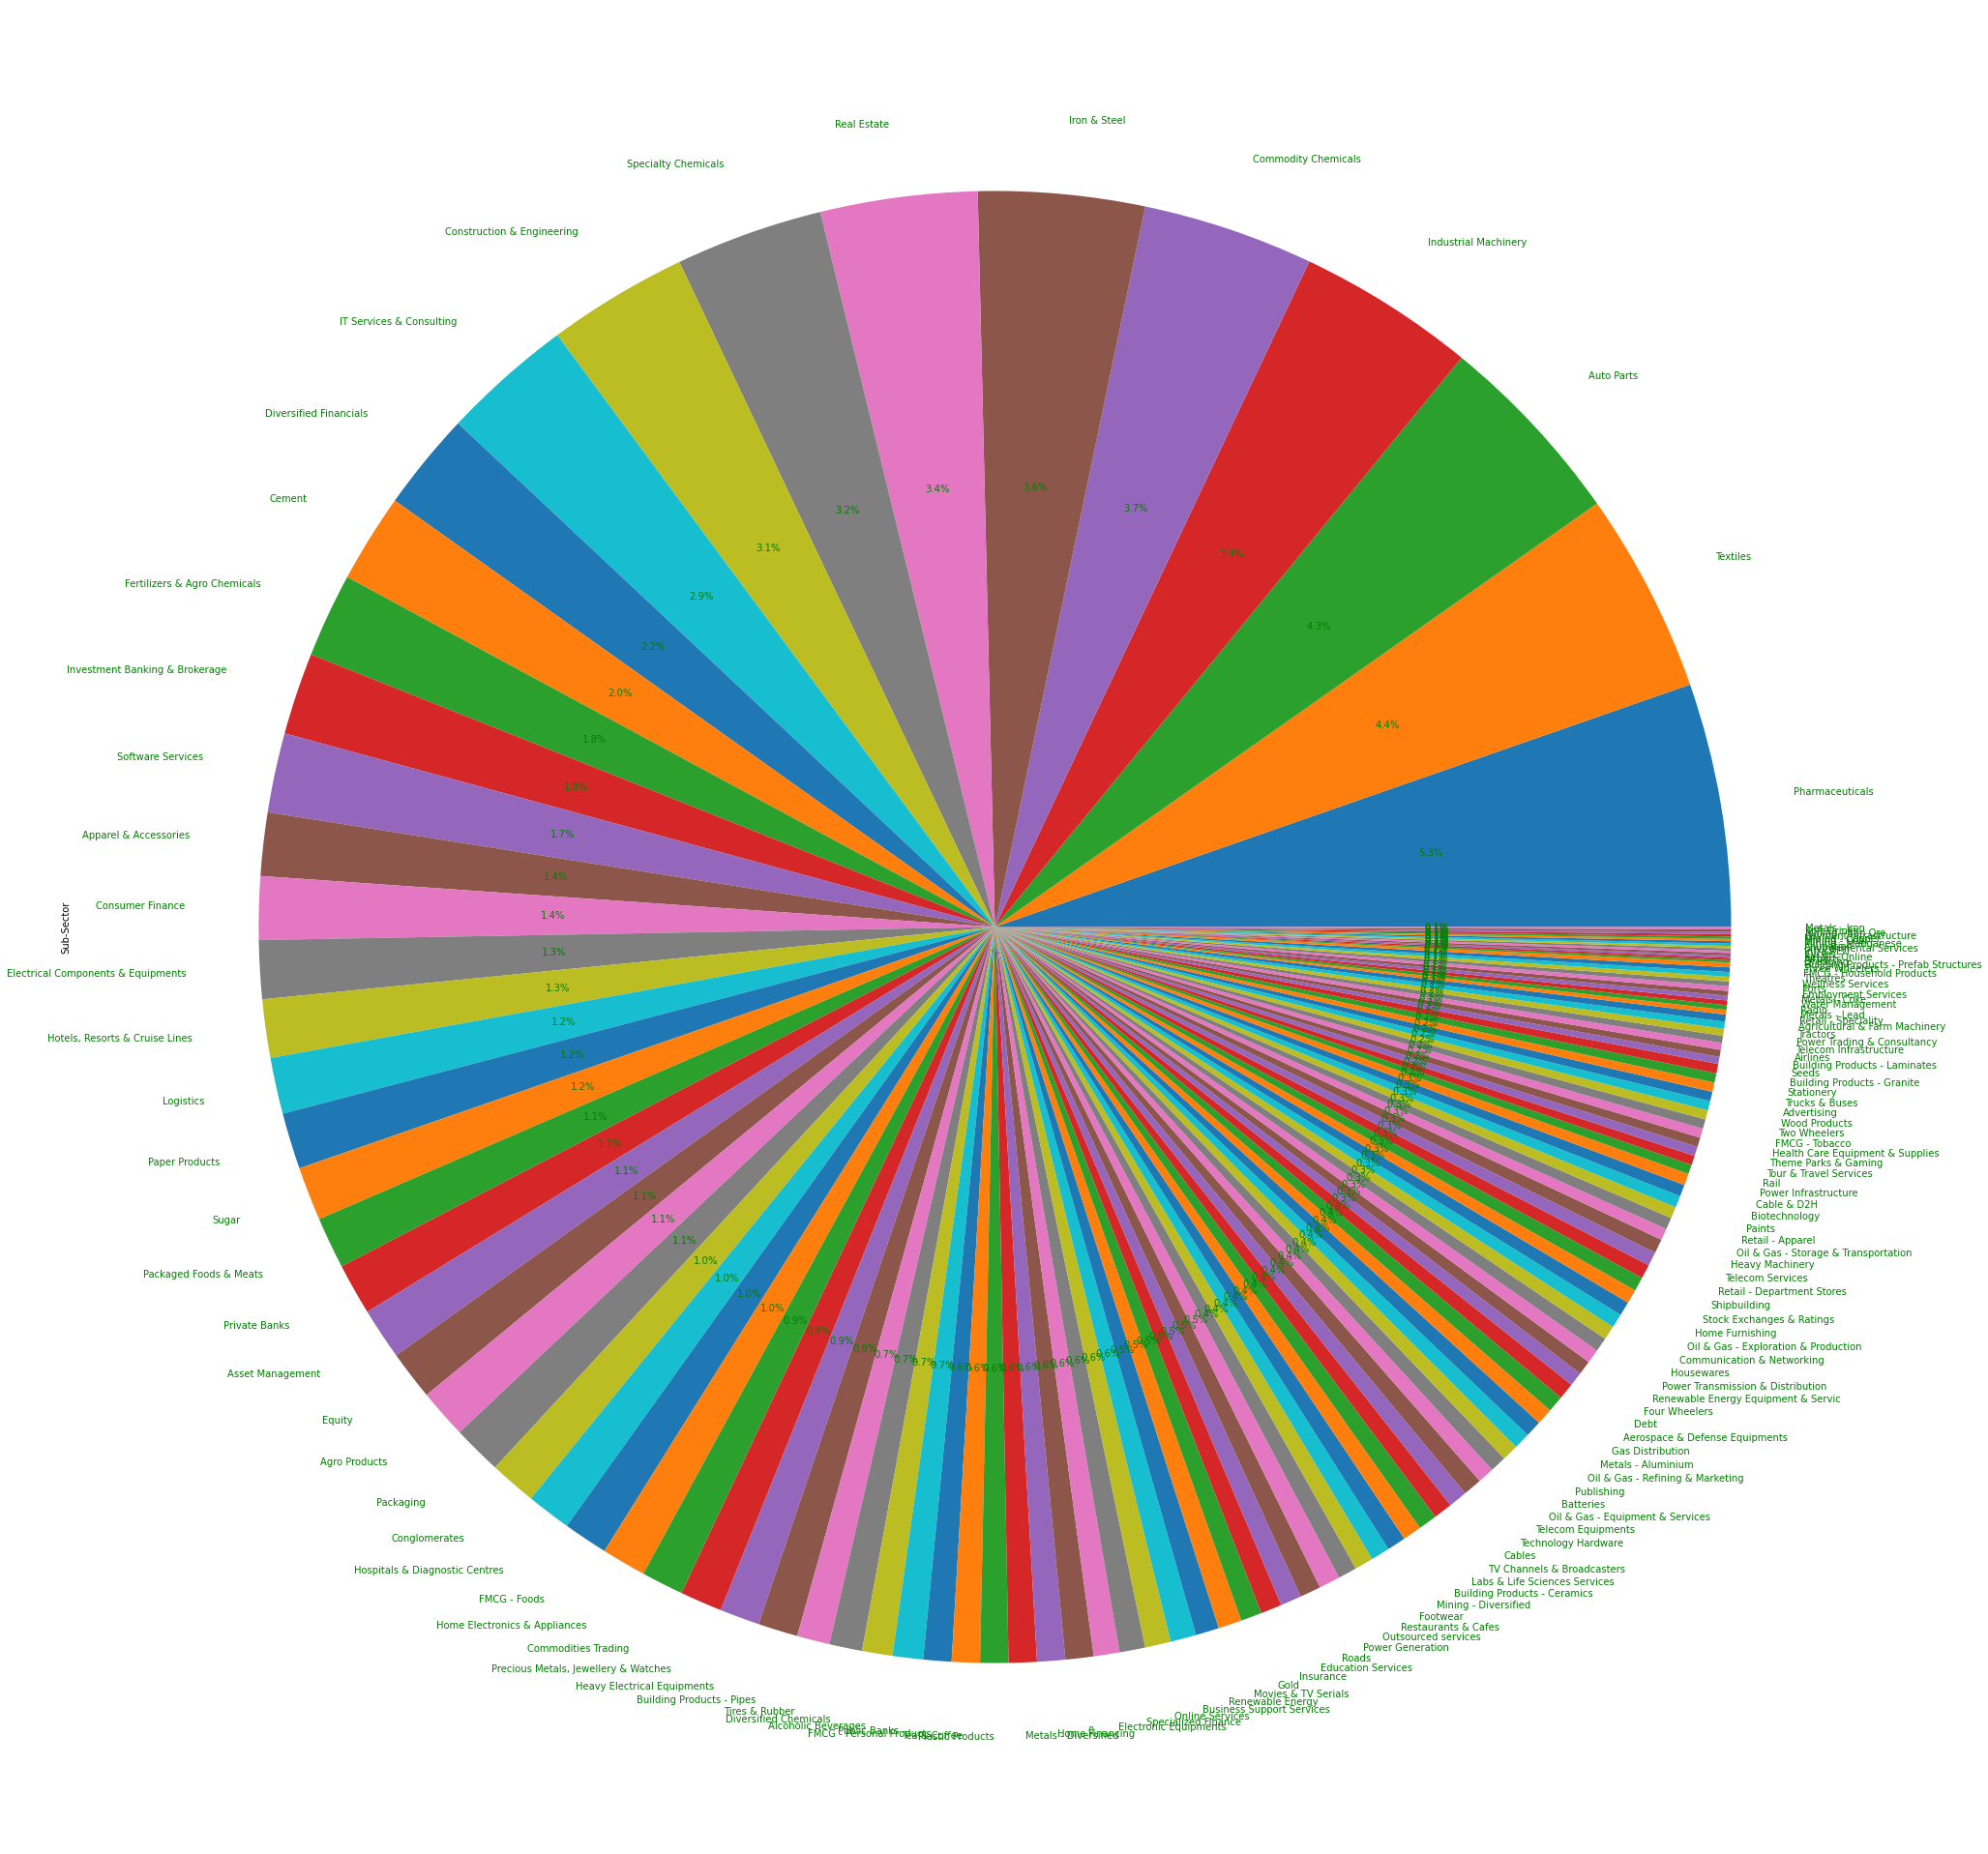

In [8]:
plt.figure(figsize=(35,35))
count_val.plot(kind="pie",textprops={'color':"green"}, autopct='%.1f%%')

In [9]:
#Secondly, visualise the companies by segregating them according to Market Cap in
#three categories: Large Cap(>20,000 crore)
#Mid Cap (5,000 to 20,000 crore) & 
#Small Cap(<5,000)

In [57]:
df = df.dropna(subset=["Market Cap", "Earnings Per Share"])

C:\Users\gargi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


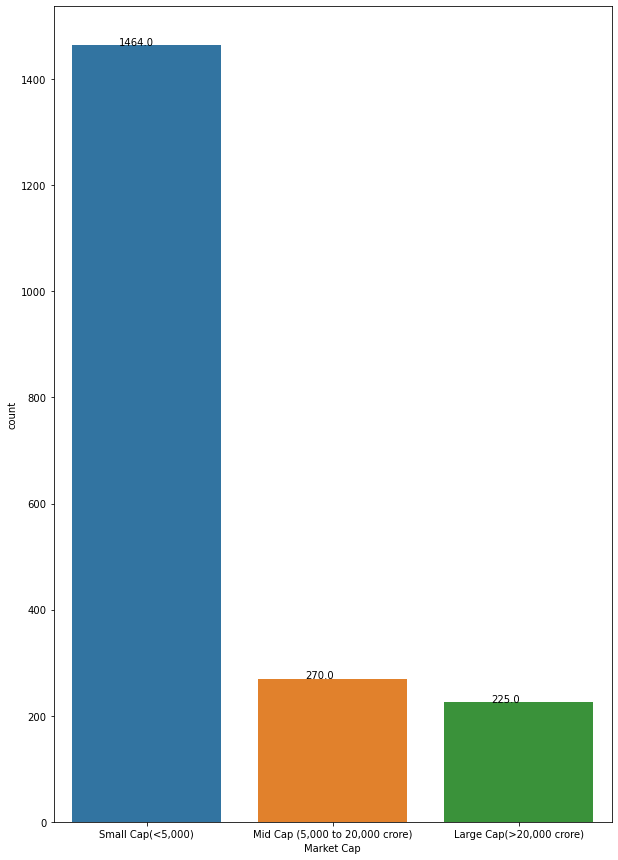

In [58]:
plt.figure(figsize=(10,15))
cat= pd.cut(df["Market Cap"],bins=[0,5000,20000,np.inf],labels=["Small Cap(<5,000)","Mid Cap (5,000 to 20,000 crore)","Large Cap(>20,000 crore)"])
ax=sns.countplot(cat)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

V : Intrinsic Value
EPS : The Company’s last 12 month earnings per share
8.5 : The constant represents the appropriate P-E ratio for a no-growth
     company as proposed by Graham.
g : The company's long-term (five years) earnings growth estimate
6 : The average Return of FDs (6%)
Y : The current yield on AAA corporate bonds.
The current yield is equal to the annual interest earned divided by the current price of the bond.
     =7.232% in India

In [59]:
df_rand = df.sample(10)
df_rand=df_rand.reset_index()
df_rand

,index,Name,Ticker,Sub-Sector,Market Cap,Close Price,PE Ratio,Return on Equity,Return on Assets,Net Profit Margin,...,Earnings Per Share,EBITDA,Long Term Investments,Reserves & Surplus,Cash and Equivalent,Book Value,Free Cash Flow,Operating Cash Flow,Unnamed: 44,Unnamed: 45
0,1754,Add-Shop E-Retail Ltd,ASRL,FMCG - Personal Products,196.514634,99.85,25.554569,46.71932,19.707842,9.787451,...,3.992194,11.480000,0.00,8.97,0.52,20.30,-0.84,0.58,NaN,NaN
1,1981,Maha Rashtra Apex Corporation Ltd,MAHAPEXLTD,Consumer Finance,130.068237,91.35,3.857302,25.541585,13.797901,93.953748,...,23.884741,32.170000,235.99,124.79,7.66,148.90,0.86,0.87,NaN,NaN
2,117,Canara Bank Ltd,CANBK,Public Banks,41008.414346,224.95,14.186866,5.498606,0.299895,3.086267,...,21.595971,4719.570000,286191.25,30606.49,178866.37,63202.97,58194.95,59117.67,NaN,NaN
3,1098,Ncl Industries Ltd,NCLIND,Cement,813.737892,174.60,5.594623,24.381249,11.863107,8.277703,...,32.155876,290.780000,0.00,407.24,70.94,664.70,95.11,240.56,NaN,NaN
4,1669,T T Ltd,TTL,Textiles,228.416781,110.10,-30.015346,-10.679203,-2.023425,-1.927168,...,-3.539856,14.310000,0.00,30.62,2.54,68.14,39.73,40.14,NaN,NaN
5,1825,Indian Acrylics Ltd,INDIANACRY,Textiles,172.671079,12.90,27.451682,4.334941,1.054652,1.178543,...,0.464817,66.199999,0.00,12.77,10.91,148.48,4.44,11.23,NaN,NaN
6,259,Gillette India Ltd,GILLETTE,FMCG - Personal Products,15871.330000,4901.50,51.135157,36.509066,22.597249,15.206134,...,95.251782,492.230000,0.00,723.52,166.32,789.01,352.99,443.16,NaN,NaN
7,1844,U. P. Hotels Ltd,UPHOT,"Hotels, Resorts & Cruise Lines",167.400000,325.50,-21.796875,-8.221378,-6.448092,-21.682665,...,-14.222222,-4.069999,0.00,84.43,34.38,89.83,-2.13,-0.54,NaN,NaN
8,1224,Aarti Surfactants Ltd,AARTISURF,Specialty Chemicals,581.729386,777.90,26.882134,15.362772,6.698031,4.645472,...,28.531961,45.570000,0.00,125.07,6.73,152.07,-25.66,35.83,NaN,NaN
9,299,Brigade Enterprises Ltd,BRIGADE,Real Estate,12184.347754,521.85,-263.047231,-1.886608,-0.355428,-2.301089,...,-2.231214,458.640000,37.71,847.91,610.71,2463.31,307.52,802.88,NaN,NaN


In [60]:
def good(EPS,Y):
    g = 15
    return (EPS * (8.5 + 2*g) * 6) / Y
    
def bad(EPS,Y):
    g= -5
    return (EPS * (8.5 + 2*g) * 6) / Y
    
def best(EPS,Y):
    g= 25
    return (EPS * (8.5 + 2*g) * 6) / Y
    

V_good=[]
V_Bad=[]
V_best=[]
for i in range(10):
    V_good.append(good( df_rand.loc[i,"Earnings Per Share"],7.232))
    V_Bad.append(bad( df_rand.loc[i, "Earnings Per Share"],7.232))
    V_best.append(best(df_rand.loc[i, "Earnings Per Share"],7.232))



In [74]:
data_plot = {'Name':df_rand["Name"],'V_Good': V_good , 'V_Bad':V_Bad,'V_Best': V_best,'Earnings Per Share':df_rand["Earnings Per Share"]}
df_plot = pd.DataFrame(data=data_plot)
df_plot

,Name,V_Good,V_Bad,V_Best,Earnings Per Share
0,Add-Shop E-Retail Ltd,127.516150,-4.968162,193.758306,3.992194
1,Maha Rashtra Apex Corporation Ltd,762.911398,-29.723821,1159.229007,23.884741
2,Canara Bank Ltd,689.804932,-26.875517,1048.145156,21.595971
3,Ncl Industries Ltd,1027.102797,-40.016992,1560.662691,32.155876
4,T T Ltd,-113.067854,4.405241,-171.804402,-3.539856
5,Indian Acrylics Ltd,14.846883,-0.578450,22.559549,0.464817
6,Gillette India Ltd,3042.472586,-118.537893,4622.977825,95.251782
7,U. P. Hotels Ltd,-454.277286,17.699115,-690.265487,-14.222222
8,Aarti Surfactants Ltd,911.349963,-35.507141,1384.778515,28.531961
9,Brigade Enterprises Ltd,-71.268032,2.776677,-108.290386,-2.231214


In [75]:
df_plot.sort_values(by=["Earnings Per Share"])

,Name,V_Good,V_Bad,V_Best,Earnings Per Share
7,U. P. Hotels Ltd,-454.277286,17.699115,-690.265487,-14.222222
4,T T Ltd,-113.067854,4.405241,-171.804402,-3.539856
9,Brigade Enterprises Ltd,-71.268032,2.776677,-108.290386,-2.231214
5,Indian Acrylics Ltd,14.846883,-0.578450,22.559549,0.464817
0,Add-Shop E-Retail Ltd,127.516150,-4.968162,193.758306,3.992194
2,Canara Bank Ltd,689.804932,-26.875517,1048.145156,21.595971
1,Maha Rashtra Apex Corporation Ltd,762.911398,-29.723821,1159.229007,23.884741
8,Aarti Surfactants Ltd,911.349963,-35.507141,1384.778515,28.531961
3,Ncl Industries Ltd,1027.102797,-40.016992,1560.662691,32.155876
6,Gillette India Ltd,3042.472586,-118.537893,4622.977825,95.251782


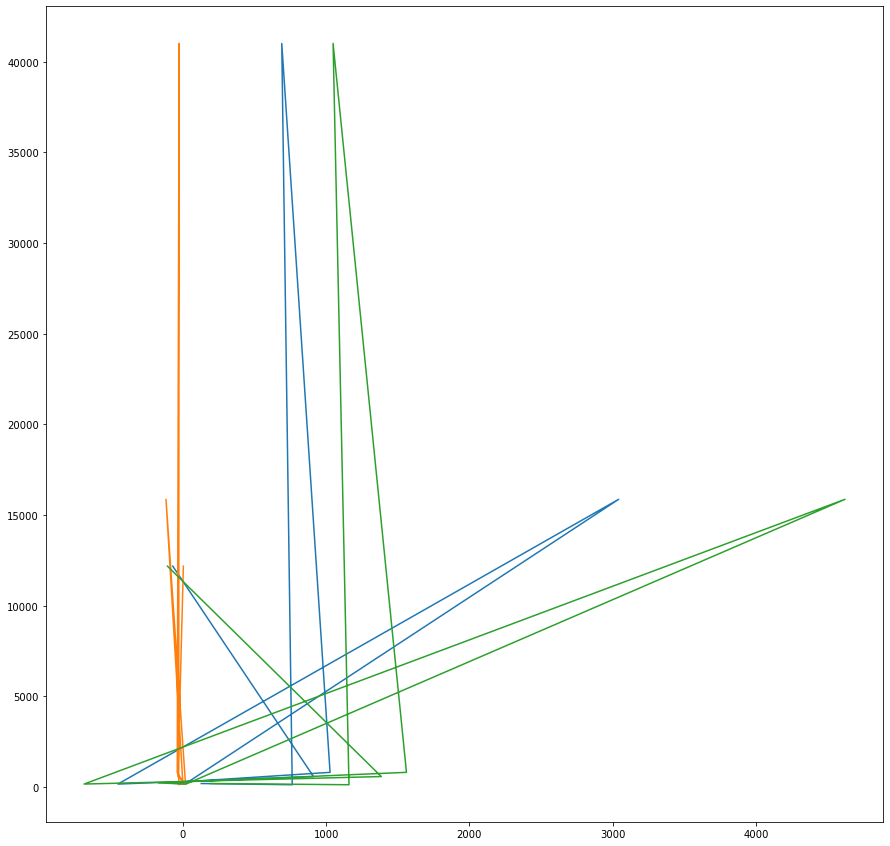

In [76]:
plt.figure(figsize=(15,15))
plt.plot(  V_good,df_rand["Market Cap"])
plt.plot( V_Bad, df_rand["Market Cap"])
plt.plot( V_best, df_rand["Market Cap"])# Plot the chart
plt.show()

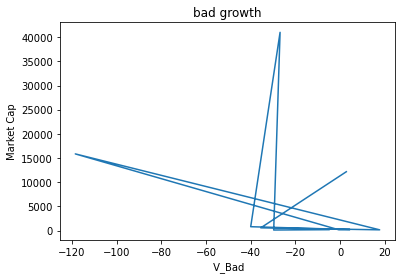

In [77]:
plt.plot( V_Bad, df_rand["Market Cap"])  # Plot the chart

plt.xlabel(" V_Bad")  # add X-axis label
plt.ylabel("Market Cap")  # add Y-axis label
plt.title("bad growth")  # add title
plt.show()

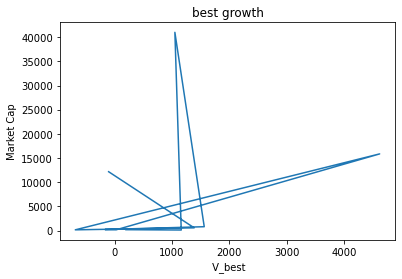

In [78]:
plt.plot( V_best, df_rand["Market Cap"])
plt.xlabel(" V_best")  # add X-axis label
plt.ylabel("Market Cap")  # add Y-axis label
plt.title("best growth")  # add title
plt.show()

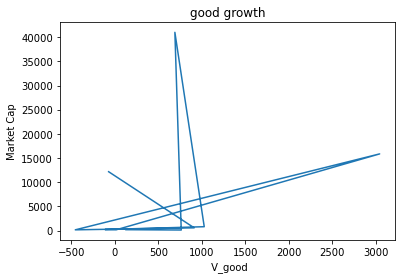

In [79]:
plt.plot( V_good, df_rand["Market Cap"])
plt.xlabel(" V_good")  # add X-axis label
plt.ylabel("Market Cap")  # add Y-axis label
plt.title("good growth")  # add title
plt.show()